## Saurabh Dadhich
### Indian Institute Of Technology, Roorkee

## Face Mask detector using Keras and MobileNet:

### Importing required packages: 

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths

### Data Preprocessing: 

In [2]:
# Testing to Show working:

test = r"F:\Spark foundation\FaceMask Detector\dataset\without_mask\0_0_benxi_0054.jpg" 
img = plt.imread(test)
print("Original dimensions: ",img.shape)

image = load_img(test, target_size=(224, 224))
image = img_to_array(image)
image = preprocess_input(image) 
print("Dimensions after passing through function: ",image.shape)
print("Image[0][100] --  ",image[0][100],"\n") 


cv2_img = cv2.imread(test,1)
cv2_img = cv2.resize(cv2_img,(224,224))
print("Dimensions after using openCV: ",cv2_img.shape)
print("CV2_Image[0][100] -- ",cv2_img[0][100]) 
#cv2.imshow("test_image",cv2_img)
#cv2.waitKey(0) 
#cv2.destroyAllWindows()

Original dimensions:  (123, 133, 3)
Dimensions after passing through function:  (224, 224, 3)
Image[0][100] --   [ 0.33333337 -0.08235294 -0.12941176] 

Dimensions after using openCV:  (224, 224, 3)
CV2_Image[0][100] --  [109 115 170]


#### Converting images into array and finding labels: 

In [14]:
def data_preprocessing():
    directory_path = r"F:\Spark foundation\FaceMask Detector\dataset"
    CATEGORIES = ["with_mask", "without_mask"]
    data = []
    labels = []
    for category in CATEGORIES:
        path = os.path.join(directory_path, category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = load_img(img_path, target_size=(224, 224))
            image = img_to_array(image)
            image = preprocess_input(image) 

            data.append(image)
            labels.append(category)


    # One-hot encoding labels:        
    lb = LabelBinarizer() 
    labels = lb.fit_transform(labels)                 # return numpy array by default
    labels = to_categorical(labels)

    data = np.array(data, dtype="float32")
    labels = np.array(labels) 

    print("Data shape: ",data.shape)
    print("Labels: ",labels.shape) 
    
    return data,labels

In [9]:
def train_test(data,labels):
    (train_X, test_X, train_Y, test_Y) = train_test_split(data, labels,test_size=0.20,shuffle=True,stratify=labels, random_state=42)
    
    return (train_X, test_X, train_Y, test_Y) 

### Data Augmentation:
As dataset is too small we will use data augmentation to create more images from a single image.


In [10]:
def data_augmentation():    
    aug = ImageDataGenerator(rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")
    
    return aug

In [11]:
def base_model(input_shape):
    baseModel = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape = input_shape))
    
    return baseModel  

In [12]:
def model_graph(baseModel):
    headModel = baseModel.output
    headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(128, activation="relu")(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(2, activation="softmax")(headModel)    
    model = Model(inputs=baseModel.input, outputs=headModel) 
    for layer in baseModel.layers:
        layer.trainable = False
        
    return model

### Training model: 

In [16]:
data,labels = data_preprocessing()
train_X, test_X, train_Y, test_Y = train_test(data,labels)
aug = data_augmentation()
baseModel = base_model(train_X.shape[1:])
model = model_graph(baseModel)

model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"]) 

D:\Anaconda\envs\py37\lib\site-packages\PIL\Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Data shape:  (3833, 224, 224, 3)
Labels:  (3833, 2)


D:\Anaconda\envs\py37\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [19]:
# Below flow method will generate batches of randomly transformed images

His = model.fit(aug.flow(train_X, train_Y, batch_size=32),
    steps_per_epoch=len(train_X) // 32,validation_data=(test_X, test_Y),
    validation_steps=len(test_X) // 32,epochs=20)  

  ...
    to  
  ['...']
Train for 95 steps, validate on 767 samples
Epoch 1/20
95/95 [==============================] - 289s 3s/step - loss: 0.3125 - accuracy: 0.8695 - val_loss: 0.4773 - val_accuracy: 0.8533
Epoch 2/20
95/95 [==============================] - 316s 3s/step - loss: 0.1412 - accuracy: 0.9400 - val_loss: 0.2016 - val_accuracy: 0.9090
Epoch 3/20
95/95 [==============================] - 292s 3s/step - loss: 0.1281 - accuracy: 0.9532 - val_loss: 0.4824 - val_accuracy: 0.8655
Epoch 4/20
95/95 [==============================] - 522s 5s/step - loss: 0.1363 - accuracy: 0.9469 - val_loss: 0.4171 - val_accuracy: 0.8736
Epoch 5/20
95/95 [==============================] - 522s 5s/step - loss: 0.1000 - accuracy: 0.9628 - val_loss: 0.2267 - val_accuracy: 0.9158
Epoch 6/20
95/95 [==============================] - 384s 4s/step - loss: 0.1170 - accuracy: 0.9542 - val_loss: 0.2619 - val_accuracy: 0.9035
Epoch 7/20
95/95 [==============================] - 281s 3s/step - loss: 0.0998 - acc

### Saving model: 

In [22]:
model.save("Mask_detector_model", save_format="h5")

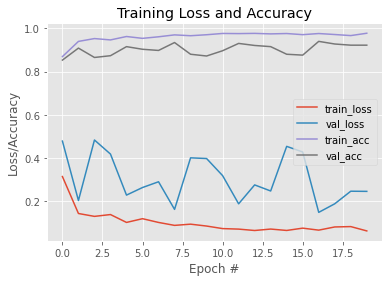

In [21]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), His.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), His.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), His.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), His.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right") 
plt.savefig("FaceMask_plot.png") 